In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [38]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

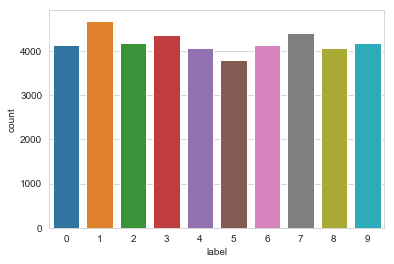

In [39]:
y_train = train["label"]
X_train = train.drop("label", axis=1)

del train
sns.countplot(y_train)

In [40]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [41]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [42]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [43]:
X_train = X_train / 255.0
test = test / 255.0

In [44]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [45]:
y_train = to_categorical(y_train, num_classes=10)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=101)

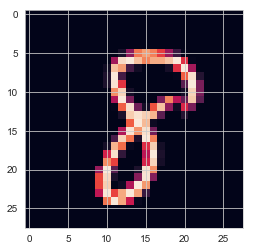

In [47]:
plt.imshow(X_train[0][:,:,0])

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [50]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [53]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [54]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [55]:
learning_rate_reduction = ReduceLROnPlateau(monitor="val_acc", patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [56]:
epochs = 30
batch_size = 86

In [57]:
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_val,y_val),
                              verbose=2, steps_per_epoch=X_train.shape[0]
                              ,callbacks=[learning_rate_reduction])

Epoch 1/30
